## Import packages

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [71]:
def report_performance(y, predictions):
    
    mse = [mean_squared_error(y, i) for i in predictions]
    mae = [mean_absolute_error(y, i) for i in predictions] 
    r2 = [r2_score(y, i) for i in predictions] 

    bold_text = "\033[1m"

    reset_text = "\033[0m"

    print(bold_text + 'Avg MSE: {}'.format(round(sum(mse)/len(mse),2)) + reset_text)
    print(bold_text + 'Avg MAE: {}'.format(round(sum(mae)/len(mae),2))+ reset_text)
    print(bold_text + 'Avg R2: {}'.format(round(sum(r2)/len(r2),2))+ reset_text)

## Import data

In [72]:
salary_dataset=pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

### Data info

In [73]:
salary_dataset = salary_dataset.drop('Unnamed: 0', axis =1)
salary_dataset.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Describe data

In [74]:
salary_dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


## Check the correlation of Data

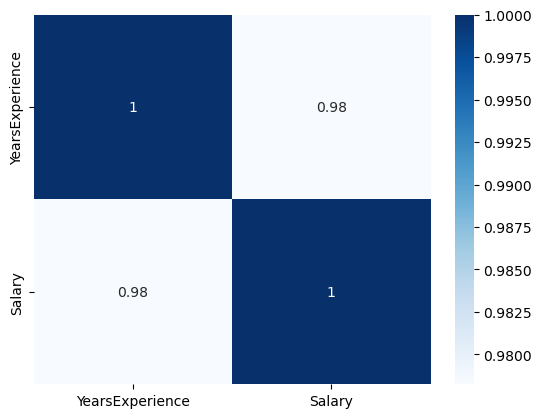

In [75]:
corr_matrix = salary_dataset[['YearsExperience', 'Salary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

## Data Distribution

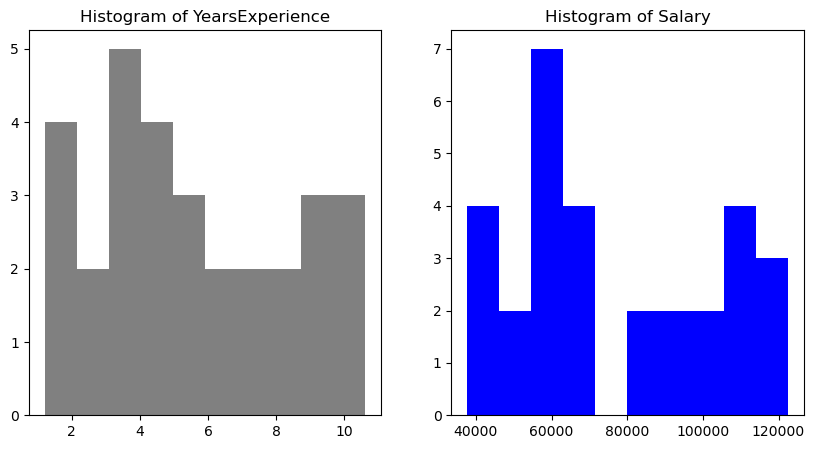

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(salary_dataset['YearsExperience'], bins=10, color = 'grey')
axs[0].set_title('Histogram of YearsExperience')

axs[1].hist(salary_dataset['Salary'], bins=10, color= 'blue')
axs[1].set_title('Histogram of Salary')

for ax in axs:
    ax.grid(False)

plt.show()

# Model Without Pre-processing

## Convert to numpy, Get X (Independent Variable) and Y (Dependent Variable)

In [77]:
data = salary_dataset.values
X = data[:, 0].reshape(-1,1)
X = np.concatenate([np.ones(X.shape[0]).reshape(-1,1), X], axis=1)
y = data[:,1].reshape(-1,1)


## Simple Linear Regression

## Fit model with 10-fold cross validation

In [78]:
model = LinearRegression()
cv_results  = cross_validate(model, X, y, cv=10, return_estimator=True)

predictions = [model.predict(X) for model in cv_results['estimator']]
    
report_performance(y, predictions)


Avg MSE: 31666898.71
Avg MAE: 4664.87
Avg R2: 0.96


### Plot Data and Predictions

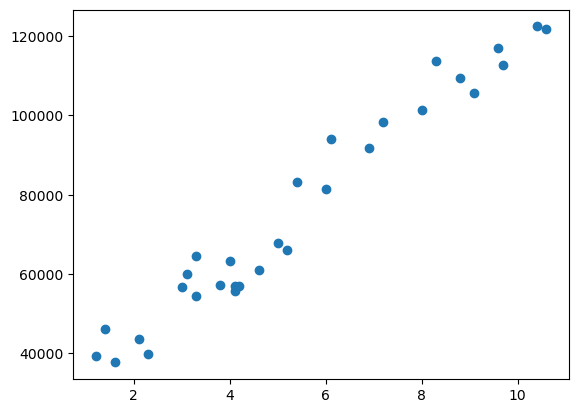

In [79]:
plt.scatter(X[:,1], y)

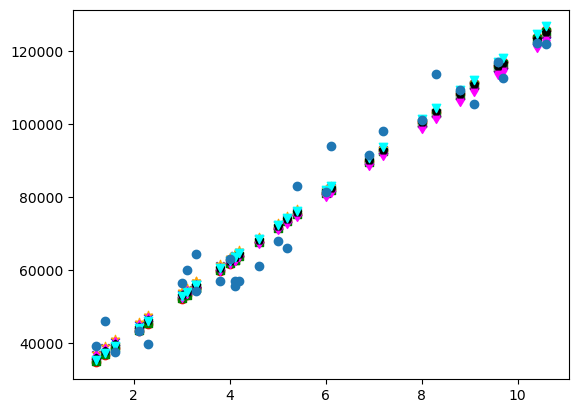

In [80]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'gray', 'magenta', 'black', 'cyan']
markers = ['o', 'x', 's', '^', '*', '.', '+', 'd', 'p', 'v']

for i in range(10):
    plt.scatter(X[:,1], predictions[i], color=colors[i], marker=markers[i], label=f"Array {i+1}")

plt.scatter(X[:,1], y)

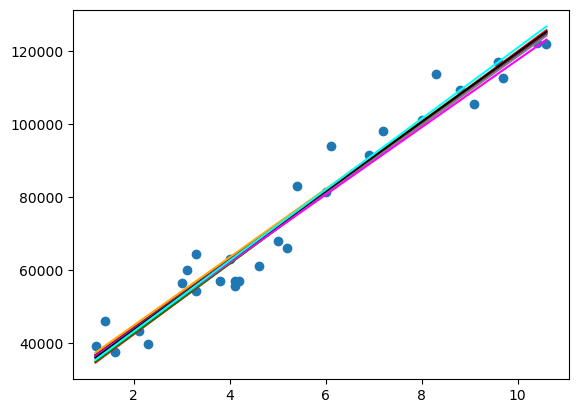

In [81]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'gray', 'magenta', 'black', 'cyan']

for i in range(10):
    plt.plot(X[:,1], predictions[i], color=colors[i],  label=f"Array {i+1}")

plt.scatter(X[:,1], y)

## Lasso Regression

In [82]:
model = Lasso(alpha=10)  # Set the Lasso regularization parameter alpha
cv_results = cross_validate(model, X, y, cv=10, return_estimator=True)

predictions = [model.predict(X) for model in cv_results['estimator']]
    
report_performance(y, predictions)

Avg MSE: 31666281.28
Avg MAE: 4664.9
Avg R2: 0.96


## Ridge regression

In [83]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)  # Set the Lasso regularization parameter alpha
cv_results = cross_validate(model, X, y, cv=10, return_estimator=True)

predictions = [model.predict(X) for model in cv_results['estimator']]
    
report_performance(y, predictions)

Avg MSE: 31664656.36
Avg MAE: 4664.95
Avg R2: 0.96
